# Começaremos 20:05
## Gosta das lives? Então você vai gostar do e-book: ManualDeDataScience.com

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option("precision", 5)
%pylab inline
from tqdm import tqdm_notebook

Populating the interactive namespace from numpy and matplotlib


- https://www.kaggle.com/supergus/multistage-continuousflow-manufacturing-process
- A manufacturer of agricultural product packing equipment has recently introduced a high-performance fruit sorting machine that uses computer vision and machine learning to classify skin defects.  
- An automotive plant implemented a predictive maintenance solution for a hydraulic press used in vehicle panel production. Detailed studies of the maintenance process showed that engineers were spending far too much time attending to breakdowns instead of allocating resources for planned maintenance. The new solution enabled them to predict equipment failure with an accuracy of 92%, plan maintenance more effectively and offer greater asset reliability and product quality. Overall equipment efficiency increased from 65% (the industry average) to 85%. 
- To see just how strong it can be, look no further than the power-consumption optimization algorithm Google applied in its data center cooling systems to reduce its electric bills–by up to 40%.
- https://deepsense.ai/portfolio-item/digitizing-industry-installation-documentation/
- https://www.ge.com/digital/iiot-platform
- https://www.kaggle.com/c/telstra-recruiting-network
- https://www.kaggle.com/c/bosch-production-line-performance/discussion/25434

# Que tipo de problema é esse? 
-  Regressão, classificação? Supervisionado?
- Qual o target?

In [5]:
data = pd.read_csv("continuous_factory_process.csv", parse_dates=['time_stamp'])
data = data.sort_values("time_stamp")

In [6]:
data.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,...,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint,Machine4.Temperature1.C.Actual,Machine4.Temperature2.C.Actual,Machine4.Pressure.C.Actual,Machine4.Temperature3.C.Actual,Machine4.Temperature4.C.Actual,Machine4.Temperature5.C.Actual,Machine4.ExitTemperature.U.Actual,Machine5.Temperature1.C.Actual,Machine5.Temperature2.C.Actual,Machine5.Temperature3.C.Actual,Machine5.Temperature4.C.Actual,Machine5.Temperature5.C.Actual,Machine5.Temperature6.C.Actual,Machine5.ExitTemperature.U.Actual,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement0.U.Setpoint,Stage2.Output.Measurement1.U.Actual,Stage2.Output.Measurement1.U.Setpoint,Stage2.Output.Measurement2.U.Actual,Stage2.Output.Measurement2.U.Setpoint,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement3.U.Setpoint,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement4.U.Setpoint,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement5.U.Setpoint,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement6.U.Setpoint,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement7.U.Setpoint,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement8.U.Setpoint,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement9.U.Setpoint,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,48.03,10.48,436.76,76.3,75.1,12.59,236,601.11,257,200.75,69.37,69.06,73.25,13.89,246.68,68.8,60.1,9.02,186,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0,99.1,108.2,80.0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,...,1.66,2.02,2.69,3.16,14.51,17.72,298.0,284.0,21.0,268.0,21.0,260.0,35.0,309.8,289.9,263.9,238.6,245.0,66.1,50.0,0.0,12.05,0.0,11.71,0

In [7]:
data.iloc[:, 42:71]

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement5.U.Setpoint,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement6.U.Setpoint,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement7.U.Setpoint,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement8.U.Setpoint,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement9.U.Setpoint,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual
0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,0.00,32.55,0.0,2.74,3.82,4.25,2.94,2.97,20.82,21.3,17.30,19.52,8.06,8.65,5.54,6.16,1.66,2.02,2.69,3.16,14.51
1,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,0.0,2.74,3.97,4.25,0.00,2.97,19.65,21.3,17.31,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
2,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,0.0,2.74,3.97,4.25,0.00,2.97,19.65,21.3,17.31,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
3,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,0.0,2.74,3.97,4.25,0.00,2.97,19.65,21.3,17.31,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
4,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,32.55,0.0,2.74,3.87,4.25,0.00,2.97,0.00,21.3,17.30,19.52,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,0.0,2.74,2.10,4.25,3.03,2.97,20.88,21.3,18.95,19.52,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00
14084,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,0.0,2.74,2.10,4.25,3.03,2.97,20.88,21.3,18.95,19.52,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00
14085,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,0.0,2.74,2.10,4.25,3.03,2.97,20.88,21.3,18.95,19.52,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00
14086,12.58,13.75,0.0,22.74,8.99,13.02,21.84,21.88,31.55,32.55,0.0,2.74,2.05,4.25,2.91,2.97,20.91,21.3,18.84,19.52,7.66,8.65,0.00,6.16,1.40,2.02,3.30,3.16,0.00


In [8]:
data['Y'] = data['Stage1.Output.Measurement0.U.Actual'] - data['Stage1.Output.Measurement0.U.Setpoint']

In [9]:
features = data.iloc[:, 1:42]
y = data['Y']

In [10]:
from lightgbm import LGBMRegressor

/Users/mario/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [11]:
features.shape

(14088, 41)

In [12]:
Xtrain, Xval = features.iloc[:7000], features.iloc[7000:]
ytrain, yval = y.iloc[:7000], y.iloc[7000:]

In [26]:
mdl = LGBMRegressor(random_state=0)
mdl.fit(Xtrain, ytrain)
p = mdl.predict(Xval)

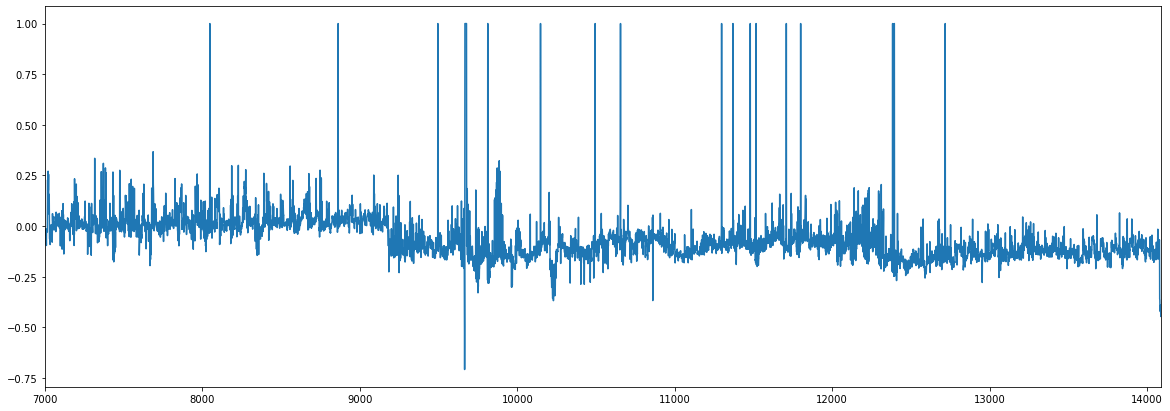

In [27]:
naive_error = (yval - p).clip(upper=1)
naive_error.plot(figsize=(20,7))

# próximo passo?

In [16]:
from sklearn.metrics import mean_absolute_error, median_absolute_error

p_base = ytrain.mean() * np.ones(yval.shape[0])
#p_base = ytrain.median() * np.ones(yval.shape[0])
mean_absolute_error(yval, p_base), median_absolute_error(yval, p_base)

(0.08625496927059799, 0.07000000000000028)

In [ ]:
# (0.07976598605663952, 0.04836065519425792) - baseline mae
# (0.08625496927059799, 0.07000000000000028) - baseline median

In [17]:
mean_absolute_error(yval, p),median_absolute_error(yval, p)

(0.10311439095816137, 0.09242650815943243)

?LGBMRegressor

In [25]:
mdl = LGBMRegressor(n_estimators=100, learning_rate=0.003, num_leaves=2**6, 
                    subsample=0.75, subsample_freq=1, colsample_bytree=1., min_child_samples=20,
                    random_state=0)
mdl.fit(Xtrain, ytrain)
p = mdl.predict(Xval)
mean_absolute_error(yval, p),median_absolute_error(yval, p)

(0.06912629616864538, 0.046220855128037086)

In [ ]:
# (0.07976598605663952, 0.04836065519425792) - baseline mae
# (0.06912629616864538, 0.046220855128037086) - modelo "tunado"

In [33]:
# (0.06985877887932913, 0.04895278905049688) - 1k, 0.0003
# (0.06912629616864538, 0.046220855128037086) - 100, 0.003

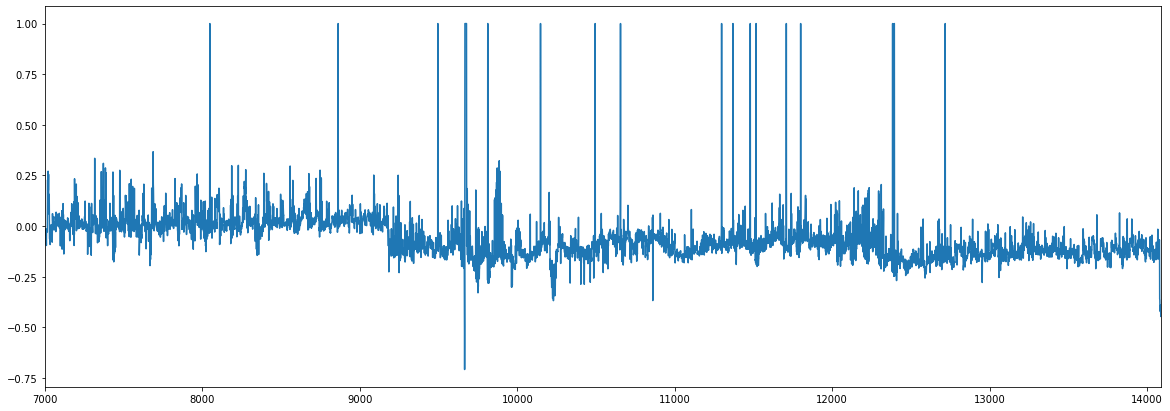

In [22]:
error = (yval - p).clip(upper=1)
error.plot(figsize=(20,7))

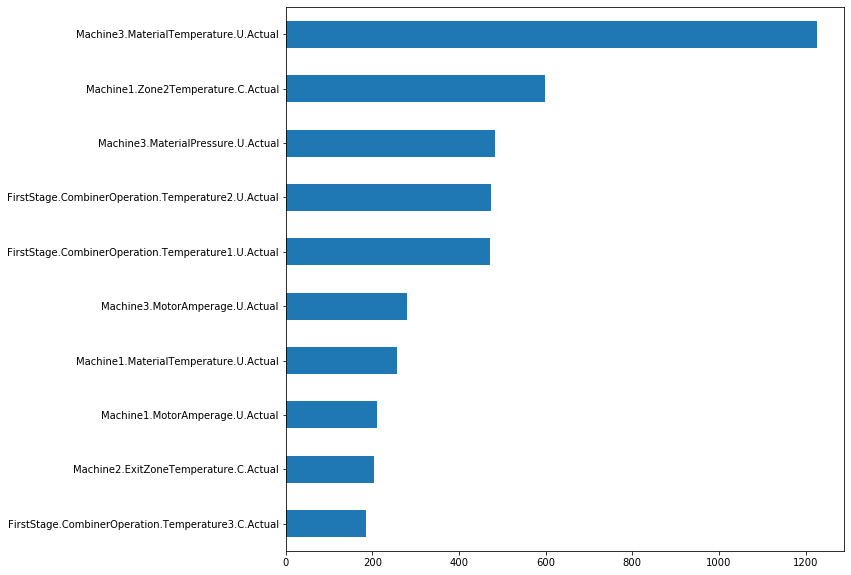

In [35]:
pd.Series(mdl.feature_importances_, index=Xtrain.columns).sort_values().tail(10).plot.barh(figsize=(10,10))

In [36]:
import shap
shap.initjs()

In [37]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(Xtrain)

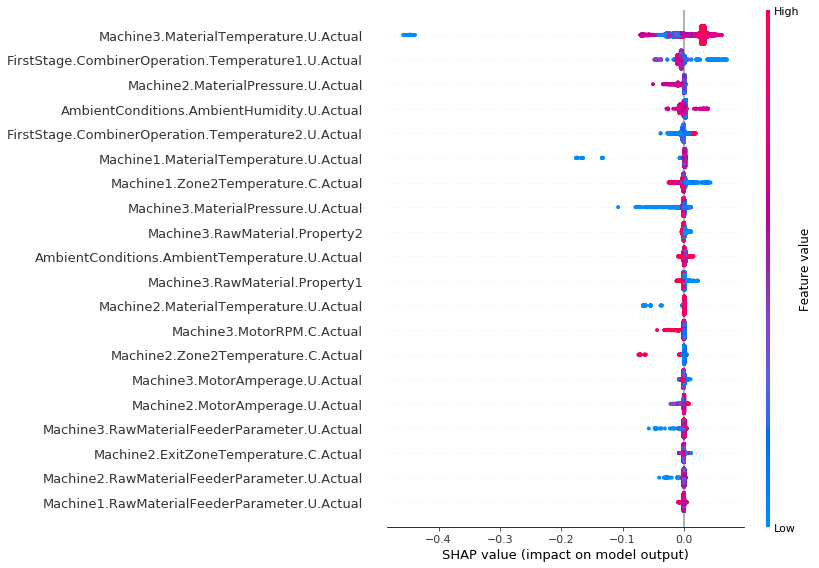

In [38]:
shap.summary_plot(shap_values, Xtrain)

In [39]:
Xtrain.columns

Index(['AmbientConditions.AmbientHumidity.U.Actual',
       'AmbientConditions.AmbientTemperature.U.Actual',
       'Machine1.RawMaterial.Property1', 'Machine1.RawMaterial.Property2',
       'Machine1.RawMaterial.Property3', 'Machine1.RawMaterial.Property4',
       'Machine1.RawMaterialFeederParameter.U.Actual',
       'Machine1.Zone1Temperature.C.Actual',
       'Machine1.Zone2Temperature.C.Actual', 'Machine1.MotorAmperage.U.Actual',
       'Machine1.MotorRPM.C.Actual', 'Machine1.MaterialPressure.U.Actual',
       'Machine1.MaterialTemperature.U.Actual',
       'Machine1.ExitZoneTemperature.C.Actual',
       'Machine2.RawMaterial.Property1', 'Machine2.RawMaterial.Property2',
       'Machine2.RawMaterial.Property3', 'Machine2.RawMaterial.Property4',
       'Machine2.RawMaterialFeederParameter.U.Actual',
       'Machine2.Zone1Temperature.C.Actual',
       'Machine2.Zone2Temperature.C.Actual', 'Machine2.MotorAmperage.U.Actual',
       'Machine2.MotorRPM.C.Actual', 'Machine2.MaterialPress

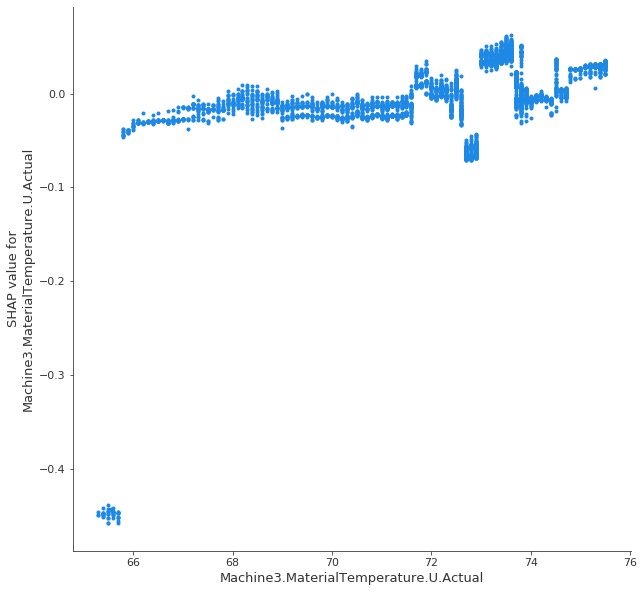

In [40]:
f,a  = pylab.subplots(1,1, figsize=(10,10))
shap.dependence_plot("Machine3.MaterialTemperature.U.Actual", shap_values, Xtrain, ax=a, interaction_index=None)

In [29]:
import joblib as jb
jb.dump(mdl, "mdl.pkl.z")

['mdl.pkl.z']

In [30]:
mdl2 = jb.load("mdl.pkl.z")

In [34]:
Xval.iloc[0, :].values

array([  15.12,   23.16,   11.54,  200.  , 1027.43,  247.  , 1271.8 ,
         72.  ,   71.5 ,   71.57,   10.67,  419.71,   81.4 ,   75.  ,
         12.85,  241.  ,  556.7 ,  256.  ,  196.14,   68.98,   69.43,
         73.19,   13.93,  227.72,   76.9 ,   59.8 ,    8.83,  221.  ,
        433.18,  205.  ,  207.99,   78.  ,   78.  ,  349.78,   13.48,
        248.95,   75.4 ,   65.  ,  104.1 ,   72.5 ,   79.9 ])

In [35]:
mdl2.predict([Xval.iloc[0, :]])

array([-0.70035029])

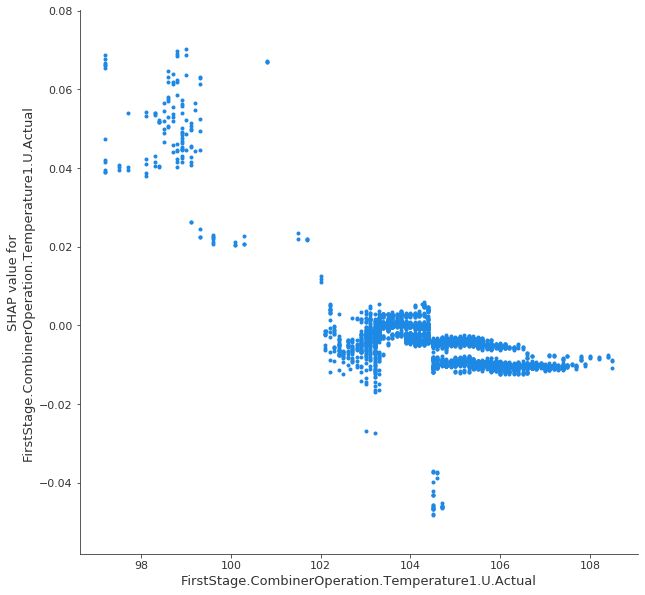

In [41]:
f,a  = pylab.subplots(1,1, figsize=(10,10))
shap.dependence_plot("FirstStage.CombinerOperation.Temperature1.U.Actual", shap_values, Xtrain, ax=a, interaction_index=None)

# que tipos de features podemos testar?

In [23]:
from itertools import combinations

combos_ = []
for f1,f2 in tqdm_notebook(combinations(Xtrain.columns, 2)):
    
    f1_ = Xtrain[f1].corr(ytrain)
    f2_ = Xtrain[f2].corr(ytrain)
    f1_f2 = (Xtrain[f2] - Xtrain[f1]).corr(ytrain)
    best_single = max(abs(f1_), abs(f2_))
    combo_score = abs(f1_f2)
    
    res = dict()
    res['f1'] = f1
    res['f2'] = f2
    res['f1_'] = f1_
    res['f2_'] = f2_
    res['f1_f2_'] = f1_f2 
    res['f1_f2'] = combo_score - best_single
    
    combos_.append(res)
    


In [24]:
df_combos = pd.DataFrame(combos_).sort_values("f1_f2", ascending=False)
df_combos = df_combos[df_combos['f1_f2'] > 0.01]
print(df_combos.shape)
df_combos.head()

(25, 6)


,f1,f2,f1_,f2_,f1_f2_,f1_f2
325,Machine1.MotorAmperage.U.Actual,Machine1.MaterialPressure.U.Actual,0.12787,-0.13846,-0.22705,0.08859
474,Machine2.RawMaterial.Property1,Machine2.Zone2Temperature.C.Actual,0.17327,-0.15729,-0.22632,0.05305
729,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,0.09228,-0.08264,-0.13476,0.04248
486,Machine2.RawMaterial.Property1,Machine3.Zone2Temperature.C.Actual,0.17327,-0.13481,-0.20975,0.03647
610,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,-0.15729,0.16341,0.19957,0.03616


In [25]:
model_eval = []
for i in range(df_combos.shape[0]):
    row = df_combos.iloc[i]
    f1 = row['f1']
    f2 = row['f2']

    Xtrain2, Xval2 = Xtrain.copy(), Xval.copy()
    Xtrain2["v"] = Xtrain2[f1] - Xtrain2[f2]
    Xval2["v"] = Xval2[f1] - Xval2[f2]
    

    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.0003, num_leaves=2**6, 
                        subsample=0.75, subsample_freq=1, colsample_bytree=1., random_state=0)
    mdl.fit(Xtrain2, ytrain)
    p = mdl.predict(Xval2)
    
    res = (f1,f2, mean_absolute_error(yval, p),median_absolute_error(yval, p))
    
    model_eval.append(res)
    print(res)

('Machine1.MotorAmperage.U.Actual', 'Machine1.MaterialPressure.U.Actual', 0.06984981625157799, 0.04895673750544027)
('Machine2.RawMaterial.Property1', 'Machine2.Zone2Temperature.C.Actual', 0.06979548154189097, 0.04889363076917658)
('Machine3.RawMaterial.Property2', 'Machine3.RawMaterial.Property3', 0.06985877887932913, 0.04895278905049688)
('Machine2.RawMaterial.Property1', 'Machine3.Zone2Temperature.C.Actual', 0.06977571243763456, 0.04895461334105816)
('Machine2.Zone2Temperature.C.Actual', 'Machine2.MotorAmperage.U.Actual', 0.0698866736423887, 0.048964305635850136)
('Machine1.MotorAmperage.U.Actual', 'Machine2.RawMaterial.Property3', 0.0698597354975916, 0.04895217759567749)
('Machine1.MotorRPM.C.Actual', 'Machine3.Zone2Temperature.C.Actual', 0.06988331989903715, 0.048728294412929085)
('Machine2.MotorAmperage.U.Actual', 'Machine3.Zone2Temperature.C.Actual', 0.06986227075943968, 0.04892150462799277)
('Machine1.MotorRPM.C.Actual', 'Machine2.Zone2Temperature.C.Actual', 0.06990789462904086

In [ ]:
# (0.06985877887932913, 0.04895278905049688)
#Machine1.MotorAmperage.U.Actual	FirstStage.CombinerOperation.Temperature2.U.Ac...	0.06946	0.04751

In [26]:
df_inters = pd.DataFrame(model_eval, columns=['f1', 'f2', 'mae', 'medae']).sort_values("mae")
df_inters.head()

,f1,f2,mae,medae
18,Machine1.MotorAmperage.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Ac...,0.06946,0.04751
19,Machine2.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,0.06958,0.04844
3,Machine2.RawMaterial.Property1,Machine3.Zone2Temperature.C.Actual,0.06978,0.04895
20,Machine1.MaterialPressure.U.Actual,Machine3.RawMaterial.Property2,0.06979,0.04895
1,Machine2.RawMaterial.Property1,Machine2.Zone2Temperature.C.Actual,0.06980,0.04889


In [28]:

Xtrain2, Xval2 = Xtrain.copy(), Xval.copy()
for f1,f2 in tqdm_notebook(combinations(Xtrain.columns, 2)):

    Xtrain2["{}_{}".format(f1,f2)] = Xtrain2[f1] - Xtrain2[f2]
    Xval2["{}_{}".format(f1,f2)] = Xval2[f1] - Xval2[f2]
    

mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.0003, num_leaves=2**6, 
                    subsample=0.75, subsample_freq=1, colsample_bytree=1., random_state=0)
mdl.fit(Xtrain2, ytrain)
p = mdl.predict(Xval2)

print(mean_absolute_error(yval, p),median_absolute_error(yval, p))



0.07798853325244294 0.05593540809065167


In [ ]:
# (0.06985877887932913, 0.04895278905049688)
#Machine1.MotorAmperage.U.Actual	FirstStage.CombinerOperation.Temperature2.U.Ac...	0.06946	0.04751
# tudo 0.07798853325244294 0.05593540809065167

In [32]:
Xtrain2, Xval2 = Xtrain.copy(), Xval.copy()
for f1,f2 in tqdm_notebook(combinations(Xtrain.columns, 2)):
    Xtrain2["DELTA_{}_{}".format(f1,f2)] = Xtrain2[f1] - Xtrain2[f2]
    Xval2["DELTA_{}_{}".format(f1,f2)] = Xval2[f1] - Xval2[f2]

In [43]:
Xtrain2.iloc[:10, :42]

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual,DELTA_AmbientConditions.AmbientHumidity.U.Actual_AmbientConditions.AmbientTemperature.U.Actual
0,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,48.03,10.48,436.76,76.3,75.1,12.59,236,601.11,257,200.75,69.37,69.06,73.25,13.89,246.68,68.8,60.1,9.02,186,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0,99.1,108.2,80.0,-6.29
1,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,48.03,10.48,436.77,76.3,75.1,12.59,236,601.11,257,220.16,69.35,69.05,73.19,13.89,246.02,69.0,60.0,9.02,186,421.16,200,213.36,78.1,78.4,341.85,13.59,262.88,65.3,65.0,99.1,109.2,80.0,-6.29
2,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,48.16,10.48,425.46,76.3,75.1,12.59,236,601.11,257,216.84,69.37,69.07,73.19,13.85,247.18,68.9,60.0,9.02,186,421.16,200,225.25,78.1,78.5,338.71,14.00,262.63,65.3,65.0,99.6,111.0,80.0,-6.29
3,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,48.57,10.48,437.01,76.3,75.1,12.59,236,601.11,257,208.61,69.38,69.08,72.81,13.90,249.92,69.1,59.9,9.02,186,421.16,200,213.99,78.1,78.5,339.15,13.67,262.22,65.4,65.0,99.6,109.2,80.0,-6.29
4,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,48.57,10.48,425.18,76.4,75.1,12.59,236,601.11,257,212.31,69.40,69.07,73.00,13.89,250.58,68.9,59.9,9.02,186,421.16,200,200.86,78.0,78.5,337.05,13.72,262.17,65.4,65.0,99.6,109.8,80.0,-6.29
5,17.24,23.53,11.54,200,963.0,247,1262.73,72.1,72.4,48.70,10.48,435.23,76.4,75.1,12.59,236,601.11,257,224.17,69.27,69.06,73.19,13.87,247.33,69.2,59.8,9.02,186,421.16,200,208.78,78.0,78.5,350.49,13.76,261.39,65.4,65.0,99.6,109.9,80.0,-6.29
6,17.24,23.53,11.54,200,963.0,247,1306.38,72.1,72.4,48.70,10.45,435.25,76.4,75.0,12.59,236,601.11,257,210.46,69.27,69.06,73.19,13.87,245.12,69.2,59.8,9.02,186,421.16,200,223.10,77.9,78.5,345.76,13.81,261.03,65.4,65.0,99.6,109.9,80.0,-6.29
7,17.24,23.53,11.54,200,963.0,247,1296.13,72.1,72.4,49.78,10.48,439.68,76.4,75.0,12.59,236,601.11,257,210.21,69.25,68.94,73.19,13.93,248.85,69.0,59.8,9.02,186,421.16,200,220.17,77.9,78.5,351.83,13.49,260.61,65.4,65.0,99.6,109.0,80.0,-6.29
8,17.24,23.53,11.54,200,963.0,247,1251.11,72.1,72.4,49.37,10.48,422.66,76.5,75.0,12.59,236,601.11,257,201.35,69.25,69.04,73.06,13.93,249.63,69.1,59.9,9.02,186,421.16,200,210.96,77.9,78.5,332.66,13.59,260.59,65.4,65.0,99.3,109.9,80.0,-6.29
9,17.24,23.53,11.54,200,963.0,247,1202.16,72.1,72.4,49.64,10.52,431.83,76.5,75.0,12.59,236,601.11,257,211.53,69.25,69.04,73.06,13.92,244.42,69.1,59.9,9.02,186,421.16,200,220.74,77.8,78.5,339.50,13.60,260.58,65.4,65.0,99.3,109.9,80.0,-6.29


In [61]:
# (0.06912629616864538, 0.046220855128037086)
accepted = Xtrain2.columns[:41].tolist()
best_mae = 0.06912629616864538
best_medae = 0.046220855128037086
for i in range(50):
    
    best_f = None
    for j in tqdm_notebook(range(42, Xtrain2.shape[1] - len(accepted))):
        fname = Xtrain2.columns[j]
        if fname in accepted:
                continue
    

        mdl = LGBMRegressor(n_estimators=100, learning_rate=0.003, num_leaves=2**6, 
                            subsample=0.75, subsample_freq=1, colsample_bytree=1., random_state=0)
        mdl.fit(Xtrain2[accepted+[fname]], ytrain)
        p = mdl.predict(Xval2[accepted+[fname]])
        
        mae = mean_absolute_error(yval, p)
        medae = median_absolute_error(yval, p)

       
        if mae < best_mae and medae < best_medae:
            print("F = {}, MAE = {}, MEDAE = {}\n".format(fname, mae, medae))
            best_mae = mae
            best_medae = medae
            best_f = fname
    accepted.append(best_f)
    print("Accepted F = {}, MAE = {}, MEDAE = {}\n".format(best_f, best_mae, best_medae))


F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.MaterialPressure.U.Actual, MAE = 0.06912629442922448, MEDAE = 0.04622084264133175

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine2.MotorRPM.C.Actual, MAE = 0.06909948570983944, MEDAE = 0.04616596642407189

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine2.MotorAmperage.U.Actual, MAE = 0.0686187055478684, MEDAE = 0.045659268339515

F = DELTA_Machine1.RawMaterial.Property3_Machine2.ExitZoneTemperature.C.Actual, MAE = 0.06806634525406247, MEDAE = 0.04366188909574559

Accepted F = DELTA_Machine1.RawMaterial.Property3_Machine2.ExitZoneTemperature.C.Actual, MAE = 0.06806634525406247



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.RawMaterialFeederParameter.U.Actual, MAE = 0.06806505363008286, MEDAE = 0.04366170138601949

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.Zone1Temperature.C.Actual, MAE = 0.06805651419587741, MEDAE = 0.04360038510723918

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.MotorRPM.C.Actual, MAE = 0.06781903851671299, MEDAE = 0.04293896897856464

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_FirstStage.CombinerOperation.Temperature1.U.Actual, MAE = 0.067659432185886, MEDAE = 0.042031466846080445



KeyboardInterrupt: 

# forward sequential feature selection

In [73]:
def ffs(Xtrain, ytrain, Xval, yval, accepted_list, new_list, errors_base, errors_fun, mdl, steps=50):
    for step in range(steps):

        best_f = None
        for fname in tqdm_notebook(new_list):
            if fname in accepted_list:
                continue

            mdl.fit(Xtrain[accepted_list+[fname]], ytrain)
            p = mdl.predict(Xval[accepted_list+[fname]])
            
            errors = [efn(yval, p) for efn in errors_fun]
            
            fscore = 0
            for e in range(len(errors_base)):
                if errors[e] < errors_base[e]:
                    fscore += 1
                    
            if fscore == len(errors_base):
                errors_base = errors
                best_f = fname
                print("F = {}, E = {}\n".format(best_f, errors_base))
                    
        accepted_list.append(best_f)
        print("Step = {}, Accepted F = {}, E = {}\n".format(step, best_f, errors_base))
    return accepted_list


In [67]:


accepted_list = Xtrain2.columns[:41].tolist()
new_list = Xtrain2.columns[41:].tolist()
errors_base = (0.06912629616864538, 0.046220855128037086)
errors_fun = (mean_absolute_error, median_absolute_error)
mdl = LGBMRegressor(n_estimators=100, learning_rate=0.003, num_leaves=2**6, 
                    subsample=0.75, subsample_freq=1, colsample_bytree=1., random_state=0)


        
al = ffs(Xtrain2, ytrain, Xval2, yval, accepted_list, new_list, errors_base, errors_fun, mdl)

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.MaterialPressure.U.Actual, E = [0.06912629442922448, 0.04622084264133175]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine2.MotorRPM.C.Actual, E = [0.06909948570983944, 0.04616596642407189]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine2.MotorAmperage.U.Actual, E = [0.0686187055478684, 0.045659268339515]

F = DELTA_Machine1.RawMaterial.Property3_Machine2.ExitZoneTemperature.C.Actual, E = [0.06806634525406247, 0.04366188909574559]

Step = 0, Accepted F = DELTA_Machine1.RawMaterial.Property3_Machine2.ExitZoneTemperature.C.Actual, E = [0.06806634525406247, 0.04366188909574559]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.RawMaterialFeederParameter.U.Actual, E = [0.06806505363008286, 0.04366170138601949]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.Zone1Temperature.C.Actual, E = [0.06805651419587741, 0.04360038510723918]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.MotorRPM.C.Actual, E = [0.06781903851671299, 0.04293896897856464]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_FirstStage.CombinerOperation.Temperature1.U.Actual, E = [0.067659432185886, 0.042031466846080445]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_FirstStage.CombinerOperation.Temperature1.U.Actual, E = [0.06623171169199804, 0.041513847213449084]

Step = 1, Accepted F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_FirstStage.CombinerOperation.Temperature1.U.Actual, E = [0.06623171169199804, 0.041513847213449084]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.RawMaterialFeederParameter.U.Actual, E = [0.06623169918873843, 0.04151382059566788]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine2.Zone2Temperature.C.Actual, E = [0.0662274705641672, 0.04144478647562011]

F = DELTA_Machine1.MotorRPM.C.Actual_Machine2.MaterialPressure.U.Actual, E = [0.06592957620169453, 0.04141906945228535]

F = DELTA_Machine2.MotorAmperage.U.Actual_Machine3.MotorRPM.C.Actual, E = [0.06512169392579989, 0.04134389002894712]

Step = 2, Accepted F = DELTA_Machine2.MotorAmperage.U.Actual_Machine3.MotorRPM.C.Actual, E = [0.06512169392579989, 0.04134389002894712]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine2.MotorRPM.C.Actual, E = [0.06505650118013104, 0.041335542485423815]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine1.MaterialTemperature.U.Actual, E = [0.06504850661211531, 0.041293984552558394]

F = DELTA_Machine1.MotorRPM.C.Actual_Machine2.MaterialPressure.U.Actual, E = [0.06487249776796367, 0.0412542387696575]

F = DELTA_Machine2.MaterialTemperature.U.Actual_FirstStage.CombinerOperation.Temperature2.U.Actual, E = [0.06475078829294957, 0.04099644468582542]

Step = 3, Accepted F = DELTA_Machine2.MaterialTemperature.U.Actual_FirstStage.CombinerOperation.Temperature2.U.Actual, E = [0.06475078829294957, 0.04099644468582542]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_AmbientConditions.AmbientTemperature.U.Actual, E = [0.06473261597898886, 0.04099546575044133]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine2.MotorAmperage.U.Actual, E = [0.06465495425167972, 0.0409579146239335]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine2.MotorRPM.C.Actual, E = [0.06454991648844356, 0.04064838377023766]

Step = 4, Accepted F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine2.MotorRPM.C.Actual, E = [0.06454991648844356, 0.04064838377023766]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_AmbientConditions.AmbientTemperature.U.Actual, E = [0.06453146513300494, 0.04063989895541442]



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/mario/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-67-1b98df8f60bd>", line 37, in <module>
    al = ffs(Xtrain2, ytrain, Xval2, yval, accepted_list, new_list, errors_base, errors_fun, mdl)
  File "<ipython-input-67-1b98df8f60bd>", line 17, in ffs
    mdl.fit(Xtrain2[accepted_list+[fname]], ytrain)
  File "/Users/mario/anaconda3/lib/python3.7/site-packages/lightgbm/sklearn.py", line 685, in fit
    callbacks=callbacks)
  File "/Users/mario/anaconda3/lib/python3.7/site-packages/lightgbm/sklearn.py", line 544, in fit
    callbacks=callbacks)
  File "/Users/mario/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py", line 218, in train
    booster.update(fobj=fobj)
  File "/Users/mario/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py", line 1802, in update
    ctypes.byref(is_finished)))
KeyboardInterrup

KeyboardInterrupt: 

In [53]:
Xtrain3, Xval3 = Xtrain.copy(), Xval.copy()
for f in tqdm_notebook(Xtrain.columns):
    for lag in [1,5,10,15,30,60,120,240]:
        Xtrain3["LAG_{}_{}".format(f, lag)] = Xtrain3[f].shift(lag)
        Xval3["LAG_{}_{}".format(f, lag)] = Xval3[f].shift(lag)
        
        Xtrain3["DELTALAG_{}_{}".format(f, lag)] = Xtrain3[f].diff(lag)
        Xval3["DELTALAG_{}_{}".format(f, lag)] = Xval3[f].diff(lag)

In [54]:
accepted_list = Xtrain3.columns[:41].tolist()
new_list = Xtrain3.columns[41:].tolist()
errors_base = (0.06912629616864538, 0.046220855128037086)
errors_fun = (mean_absolute_error, median_absolute_error)
mdl = LGBMRegressor(n_estimators=100, learning_rate=0.003, num_leaves=2**6, 
                    subsample=0.75, subsample_freq=1, colsample_bytree=1., random_state=0)


al = ffs(Xtrain3, ytrain, Xval3, yval, accepted_list, new_list, errors_base, errors_fun, mdl, steps=5)

F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_10, E = [0.06911405422323279, 0.04616911156072212]

F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_15, E = [0.06910276107079161, 0.046122410472889896]

F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_30, E = [0.06909453016794313, 0.0460568459241108]

F = DELTALAG_AmbientConditions.AmbientTemperature.U.Actual_60, E = [0.06908049648992227, 0.046045334793561876]

F = DELTALAG_Machine1.Zone2Temperature.C.Actual_120, E = [0.0690771975124678, 0.046030548800911064]

F = LAG_Machine1.MaterialPressure.U.Actual_1, E = [0.06876624238423512, 0.04525723907401158]

F = LAG_Machine1.ExitZoneTemperature.C.Actual_30, E = [0.06841654223643244, 0.04507975169891909]


Step = 0, Accepted F = LAG_Machine1.ExitZoneTemperature.C.Actual_30, E = [0.06841654223643244, 0.04507975169891909]



F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_10, E = [0.06840176632921473, 0.045076886415416406]

F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_30, E = [0.0683818377556436, 0.04505790999919179]

F = DELTALAG_AmbientConditions.AmbientTemperature.U.Actual_60, E = [0.06836634704731723, 0.044983900486118]

F = LAG_Machine1.MaterialPressure.U.Actual_1, E = [0.06831132408415481, 0.044487347527481846]


Step = 1, Accepted F = LAG_Machine1.MaterialPressure.U.Actual_1, E = [0.06831132408415481, 0.044487347527481846]



F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_10, E = [0.06829373052934772, 0.044484098640395264]

F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_240, E = [0.06826978349077117, 0.04430044978332248]

F = LAG_Machine3.MaterialPressure.U.Actual_60, E = [0.06822376909889401, 0.04414502527444758]

F = DELTALAG_FirstStage.CombinerOperation.Temperature1.U.Actual_60, E = [0.06821749303567697, 0.04297293663013452]


Step = 2, Accepted F = DELTALAG_FirstStage.CombinerOperation.Temperature1.U.Actual_60, E = [0.06821749303567697, 0.04297293663013452]



F = LAG_AmbientConditions.AmbientHumidity.U.Actual_5, E = [0.06817766213721634, 0.04293757747588417]

F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_240, E = [0.06810846028576521, 0.04239984849225692]


Step = 3, Accepted F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_240, E = [0.06810846028576521, 0.04239984849225692]



F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_10, E = [0.06809943651966419, 0.04239061100802016]

F = DELTALAG_AmbientConditions.AmbientHumidity.U.Actual_30, E = [0.06809729850754664, 0.042382617791000776]

F = DELTALAG_Machine1.RawMaterialFeederParameter.U.Actual_1, E = [0.06801569730423264, 0.04218872690774539]

F = DELTALAG_Machine2.MotorRPM.C.Actual_1, E = [0.06800471225253227, 0.04216325504239804]

F = DELTALAG_Machine2.MaterialPressure.U.Actual_120, E = [0.06799178980302562, 0.0421413091916823]


Step = 4, Accepted F = DELTALAG_Machine2.MaterialPressure.U.Actual_120, E = [0.06799178980302562, 0.0421413091916823]



In [56]:
accept1 = al[:]

In [ ]:
e2 = [0.06799178980302562, 0.0421413091916823]

In [76]:
# (0.06912629616864538, 0.046220855128037086)
from itertools import combinations
Xtrain4, Xval4 = Xtrain3.copy(), Xval3.copy()
for f1,f2 in tqdm_notebook(combinations(Xtrain.columns, 2)):
    Xtrain4["DELTA_{}_{}".format(f1,f2)] = Xtrain4[f1] - Xtrain4[f2]
    Xval4["DELTA_{}_{}".format(f1,f2)] = Xval4[f1] - Xval4[f2]



In [77]:

accepted_list = accept1
new_list =  Xtrain4.columns[-820:].tolist()
errors_base = [0.06799178980302562, 0.0421413091916823]
errors_fun = (mean_absolute_error, median_absolute_error)
mdl = LGBMRegressor(n_estimators=100, learning_rate=0.003, num_leaves=2**6, 
                    subsample=0.75, subsample_freq=1, colsample_bytree=1., random_state=0)


        
al = ffs(Xtrain4, ytrain, Xval4, yval, accepted_list, new_list, errors_base, errors_fun, mdl)

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.RawMaterialFeederParameter.U.Actual, E = [0.06799178952596108, 0.042141305718269684]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine3.MotorRPM.C.Actual, E = [0.06798059056197964, 0.04212370244217256]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine2.ExitZoneTemperature.C.Actual, E = [0.06797231951145458, 0.0419948397617414]

F = DELTA_Machine1.RawMaterial.Property3_Machine2.ExitZoneTemperature.C.Actual, E = [0.06671883376515361, 0.040821010153928805]


Step = 0, Accepted F = DELTA_Machine1.RawMaterial.Property3_Machine2.ExitZoneTemperature.C.Actual, E = [0.06671883376515361, 0.040821010153928805]



F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine2.MotorRPM.C.Actual, E = [0.06667177449345908, 0.0407007491802166]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_FirstStage.CombinerOperation.Temperature3.C.Actual, E = [0.06619578783265063, 0.040562809051035265]

F = DELTA_Machine1.MaterialTemperature.U.Actual_Machine3.MaterialTemperature.U.Actual, E = [0.06538518537292785, 0.040557673211173484]


Step = 1, Accepted F = DELTA_Machine1.MaterialTemperature.U.Actual_Machine3.MaterialTemperature.U.Actual, E = [0.06538518537292785, 0.040557673211173484]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_AmbientConditions.AmbientTemperature.U.Actual, E = [0.06531106934553299, 0.04024121381314266]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_FirstStage.CombinerOperation.Temperature3.C.Actual, E = [0.06503330672282379, 0.039857435119571516]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_FirstStage.CombinerOperation.Temperature3.C.Actual, E = [0.06502556329727202, 0.03943612211868097]

F = DELTA_Machine1.RawMaterial.Property3_Machine3.RawMaterial.Property1, E = [0.064548527914434, 0.03819783461463133]

F = DELTA_Machine1.MotorRPM.C.Actual_Machine3.RawMaterial.Property1, E = [0.06438118530259376, 0.037628337138875256]

F = DELTA_Machine3.RawMaterial.Property2_FirstStage.CombinerOperation.Temperature2.U.Actual, E = [0.06292522326229423, 0.0369010418264773]


Step = 2, Accepted F = DELTA_Machine3.RawMaterial.Property2_FirstStage.CombinerOperation.Temperature2.U.Actual, E = [0.06292522326229423, 0.0369010418264773]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.MotorAmperage.U.Actual, E = [0.06292275805748192, 0.03688650066414284]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.MotorRPM.C.Actual, E = [0.06287679952484684, 0.03677907520487689]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine3.MotorRPM.C.Actual, E = [0.06285102446074778, 0.03671456692150532]

F = DELTA_Machine1.ExitZoneTemperature.C.Actual_Machine3.Zone2Temperature.C.Actual, E = [0.06274979650901699, 0.036669839209693245]


Step = 3, Accepted F = DELTA_Machine1.ExitZoneTemperature.C.Actual_Machine3.Zone2Temperature.C.Actual, E = [0.06274979650901699, 0.036669839209693245]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.MotorAmperage.U.Actual, E = [0.06274704597075996, 0.03665560757158487]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.MotorRPM.C.Actual, E = [0.06267371548190508, 0.03661152666478634]

F = DELTA_Machine2.Zone1Temperature.C.Actual_Machine3.MaterialTemperature.U.Actual, E = [0.062326090721637736, 0.03650623404859826]


Step = 4, Accepted F = DELTA_Machine2.Zone1Temperature.C.Actual_Machine3.MaterialTemperature.U.Actual, E = [0.062326090721637736, 0.03650623404859826]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.RawMaterialFeederParameter.U.Actual, E = [0.06232609028141056, 0.036506233566651]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.MotorAmperage.U.Actual, E = [0.06232060349379904, 0.03646120119591678]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine2.Zone1Temperature.C.Actual, E = [0.06231931496783707, 0.0364578178944327]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine1.MotorRPM.C.Actual, E = [0.06225102714482627, 0.03643902060288684]

F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine3.MotorRPM.C.Actual, E = [0.062237408234285536, 0.03618375429810533]


Step = 5, Accepted F = DELTA_AmbientConditions.AmbientTemperature.U.Actual_Machine3.MotorRPM.C.Actual, E = [0.062237408234285536, 0.03618375429810533]



F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine1.RawMaterialFeederParameter.U.Actual, E = [0.06223532185653654, 0.036150934315343664]

F = DELTA_AmbientConditions.AmbientHumidity.U.Actual_Machine2.MotorAmperage.U.Actual, E = [0.0622216875654761, 0.03611375559504321]

F = DELTA_Machine1.RawMaterial.Property3_Machine1.ExitZoneTemperature.C.Actual, E = [0.062188233036762526, 0.0357401222291126]



KeyboardInterrupt: 